In [1]:
import pandas as pd
from datetime import date
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import numpy as np



## Preparacion de los datos
### Generaremos un dataset con informacion diaria

1. Cargamos nuestra informacion de diferentes csv

In [2]:
#Cargamos datos meteorologicos
# Lee el archivo CSV con solo las columnas especificadas
df_clima = pd.read_csv("../../Datos/" + "datos_meteorologicos_diarios.csv")

# Cambia a formato fecha
df_clima['time'] = pd.to_datetime(df_clima['time'], format='%m/%d/%Y')

# Cargamos datos accidentes
# Lee el archivo CSV con solo las columnas especificadas
df_vial = pd.read_csv("../../Datos/" + "carretera_info.csv", encoding='latin1')

# Cambia a formato fecha
df_vial['fecha'] = pd.to_datetime(df_vial['fecha'])


2. Creamos dataframes con eventos para despues crear variable categorica 

In [3]:
# Fechas partidos tigres 2017 - 2023
fechas = [
    "1/8/2017", "1/22/2017", "2/5/2017", "2/23/2017", "2/26/2017", "3/15/2017", "4/2/2017", "4/12/2017",
    "4/16/2017", "4/19/2017", "4/30/2017", "5/11/2017", "5/19/2017", "5/26/2017", "7/23/2017", "8/3/2017",
    "8/6/2017", "8/20/2017", "8/27/2017", "9/13/2017", "10/1/2017", "10/18/2017", "10/22/2017", "11/6/2017",
    "11/26/2017", "12/3/2017", "12/8/2017", "1/14/2018", "1/28/2018", "2/11/2018", "2/18/2018", "2/25/2018",
    "2/28/2018", "3/11/2018", "3/14/2018", "4/1/2018", "4/15/2018", "4/29/2018", "5/4/2018", "7/22/2018",
    "7/30/2018", "8/9/2018", "8/12/2018", "8/16/2018", "8/23/2018", "9/2/2018", "9/24/2018", "9/27/2018",
    "10/7/2018", "10/28/2018", "11/11/2018", "11/30/2018", "1/20/2019", "2/3/2019", "2/17/2019", "2/27/2019",
    "3/3/2019", "3/13/2019", "3/17/2019", "4/4/2019", "4/7/2019", "4/21/2019", "4/24/2019", "5/5/2019",
    "5/12/2019", "5/19/2019", "5/24/2019", "7/21/2019", "8/11/2019", "8/25/2019", "9/1/2019", "9/25/2019",
    "10/6/2019", "10/27/2019", "10/31/2019", "11/10/2019", "12/2/2019", "1/12/2020", "1/26/2020", "2/9/2020",
    "2/27/2020", "3/1/2020", "3/15/2020", "4/5/2020", "4/19/2020", "5/3/2020", "8/2/2020", "8/12/2020",
    "8/23/2020", "9/6/2020", "9/13/2020", "9/20/2020", "10/4/2020", "10/25/2020", "11/8/2020", "11/23/2020",
    "11/27/2020", "1/10/2021", "1/29/2021", "2/18/2021", "2/22/2021", "3/3/2021", "3/14/2021", "4/11/2021",
    "4/25/2021", "8/8/2021", "8/18/2021", "8/29/2021", "9/12/2021", "9/26/2021", "10/4/2021", "10/21/2021",
    "10/31/2021", "11/7/2021", "11/29/2021", "12/2/2021", "1/16/2022", "2/7/2022", "2/20/2022", "3/3/2022",
    "3/20/2022", "4/4/2022", "4/17/2022", "4/24/2022", "5/16/2022", "5/22/2022", "7/3/2022", "7/18/2022",
    "7/24/2022", "7/31/2022", "8/15/2022", "8/28/2022", "9/8/2022", "9/11/2022", "10/9/2022", "10/14/2022",
    "12/14/2022", "12/18/2022", "12/23/2022", "12/28/2022"
]

# Fechas partidos rayados 2017 - 2023
new_fechas = [
    "10/24/2022", "10/16/2022", "10/2/2022", "9/18/2022", "9/7/2022", "9/4/2022", "8/21/2022", "8/7/2022",
    "7/27/2022", "7/10/2022", "6/19/2022", "5/8/2022", "5/1/2022", "4/21/2022", "4/10/2022", "3/16/2022",
    "3/12/2022", "3/6/2022", "2/27/2022", "1/23/2022", "1/9/2022", "11/25/2021", "10/24/2021", "10/17/2021",
    "9/23/2021", "9/20/2021", "8/22/2021", "8/15/2021", "8/12/2021", "8/12/2021", "8/1/2021", "7/26/2021",
    "7/11/2021", "5/17/2021", "5/6/2021", "5/2/2021", "4/22/2021", "4/19/2021", "4/16/2021", "4/4/2021",
    "3/11/2021", "3/7/2021", "3/1/2021", "2/7/2021", "1/17/2021", "11/23/2020", "11/5/2020", "11/5/2020",
    "11/1/2020", "10/18/2020", "9/27/2020", "9/9/2020", "8/31/2020", "8/16/2020", "8/9/2020", "7/29/2020",
    "5/10/2020", "4/26/2020", "4/12/2020", "3/22/2020", "3/12/2020", "3/8/2020", "2/23/2020", "2/20/2020",
    "2/16/2020", "2/2/2020", "1/30/2020", "1/19/2020", "12/27/2019", "12/5/2019", "11/29/2019", "11/24/2019",
    "11/6/2019", "11/3/2019", "10/21/2019", "9/29/2019", "9/22/2019", "9/15/2019", "8/30/2019", "8/18/2019",
    "8/4/2019", "8/1/2019", "5/16/2019", "5/13/2019", "5/2/2019", "4/28/2019", "4/15/2019", "4/5/2019",
    "3/31/2019", "3/10/2019", "3/7/2019", "2/28/2019", "2/24/2019", "2/10/2019", "1/27/2019", "1/13/2019",
    "1/6/2019", "12/6/2018", "11/29/2018", "11/25/2018", "11/4/2018", "11/1/2018", "10/21/2018", "10/10/2018",
    "10/3/2018", "9/30/2018", "9/16/2018", "8/29/2018", "8/26/2018", "8/19/2018", "8/5/2018", "8/2/2018",
    "5/6/2018", "4/22/2018", "4/8/2018", "3/18/2018", "3/8/2018", "3/4/2018", "2/21/2018", "2/15/2018",
    "2/4/2018", "1/25/2018", "1/21/2018", "1/7/2018", "12/22/2017", "12/11/2017", "12/4/2017", "11/27/2017",
    "11/19/2017", "11/16/2017", "11/10/2017", "11/2/2017", "10/29/2017", "10/26/2017", "10/15/2017",
    "9/17/2017", "9/14/2017", "9/10/2017", "8/24/2017", "8/13/2017", "7/30/2017", "7/27/2017", "5/14/2017",
    "5/7/2017", "4/23/2017", "4/9/2017", "4/6/2017", "3/19/2017", "3/16/2017", "3/8/2017", "3/5/2017",
    "3/1/2017", "2/19/2017", "2/12/2017", "2/2/2017", "1/29/2017", "1/15/2017"
]

# Crear DataFrames
df_tigres = pd.DataFrame({'fecha': fechas})
df_rayados = pd.DataFrame({'fecha': new_fechas})

# Convertir las columnas 'fecha' a formato datetime
df_tigres['fecha'] = pd.to_datetime(df_tigres['fecha'], format='%m/%d/%Y')
df_rayados['fecha'] = pd.to_datetime(df_rayados['fecha'], format='%m/%d/%Y')

# Combinar los DataFrames en uno solo
df_partidos = pd.concat([df_tigres, df_rayados], ignore_index=True)


3. Creamos variables categoricas en base a la fecha

In [4]:
# Convertimos la columna con fecha en datetime
df_clima['time'] = pd.to_datetime(df_clima['time'])

# Agregar la columna 'dia_de_la_semana' como número (0=Lunes, 1=Martes, ..., 6=Domingo)
df_clima['dia_de_la_semana'] = df_clima['time'].dt.weekday

# Agregar la columna 'semana_del_mes' como número (1-5)
df_clima['semana_del_mes'] = df_clima['time'].dt.strftime('%U').astype(int) + 1

# Agregar la columna 'semana_del_anio' como número (1-53)
df_clima['semana_del_anio'] = df_clima['time'].dt.strftime('%U').astype(int) + 1

# Agregar la columna 'mes' como número (1-12)
df_clima['mes'] = df_clima['time'].dt.month

# Agregar la columna 'anio' como número
df_clima['anio'] = df_clima['time'].dt.year.astype(int)

# Agregar la columna 'trimestre' como número (1-4)
df_clima['trimestre'] = df_clima['time'].dt.quarter

# Agregar la columna 'dia_del_mes' como número (1-31)
df_clima['dia_del_mes'] = df_clima['time'].dt.day

# Agregar la columna 'dia_del_anio' como número (1-366)
df_clima['dia_del_anio'] = df_clima['time'].dt.strftime('%j').astype(int)

# Agregar la columna 'es_fin_de_semana' como número (1 si es fin de semana, 0 si no)
df_clima['es_fin_de_semana'] = df_clima['time'].dt.weekday.isin([5, 6]).astype(int)

# Crear una columna 'es_festivo_mexico' como número (1 si es festivo, 0 si no)
MX_holidays = holidays.Mexico()
df_clima['es_festivo_mexico'] = df_clima['time'].apply(lambda x: 1 if x in MX_holidays else 0)

# Aplicar la función a la columna 'fecha' y crear una nueva columna 'dia_partido'
df_clima['dia_partido'] = df_clima['time'].apply(lambda x: 1 if x in df_partidos['fecha'].values else 0)

# Agregar la columna 'es_dia_laborable' como número (1 si es día laborable, 0 si no)
df_clima['es_dia_laborable'] = (~df_clima['time'].dt.weekday.isin([5, 6]) & ~df_clima['es_festivo_mexico']).astype(int)

# Agregar la columna 'estacion' como número (1-4)
def determinar_estacion(mes):
    estaciones = {
        3: 1, 4: 1, 5: 1,   # Primavera
        6: 2, 7: 2, 8: 2,   # Verano
        9: 3, 10: 3, 11: 3, # Otoño
        12: 4, 1: 4, 2: 4   # Invierno
    }
    return estaciones[mes]

df_clima['estacion'] = df_clima['time'].dt.month.apply(determinar_estacion)


4. Agrupamos los datos de accidentes por dia

In [5]:
# Agrupacion diaria
agregacion_por_fecha = df_vial.groupby([df_vial['fecha'].dt.date])['folio'].count()
agregacion_por_fecha = agregacion_por_fecha.reset_index()
agregacion_por_fecha = agregacion_por_fecha.rename(columns={'folio': 'count'})
agregacion_por_fecha['fecha'] = pd.to_datetime(agregacion_por_fecha['fecha'])


In [6]:
# Combinamos dos DataFrames, df_vial y df_clima, utilizando una combinación izquierda ('left') basada en las columnas 'fecha' y 'time'.
df_new = df_clima.merge(agregacion_por_fecha, left_on='time', right_on='fecha', how='left').drop(columns='fecha')

In [8]:
df_new.to_csv('../../Datos/unbalanced_df')

## Matriz de correlación y algunas interpretaciones de la misma

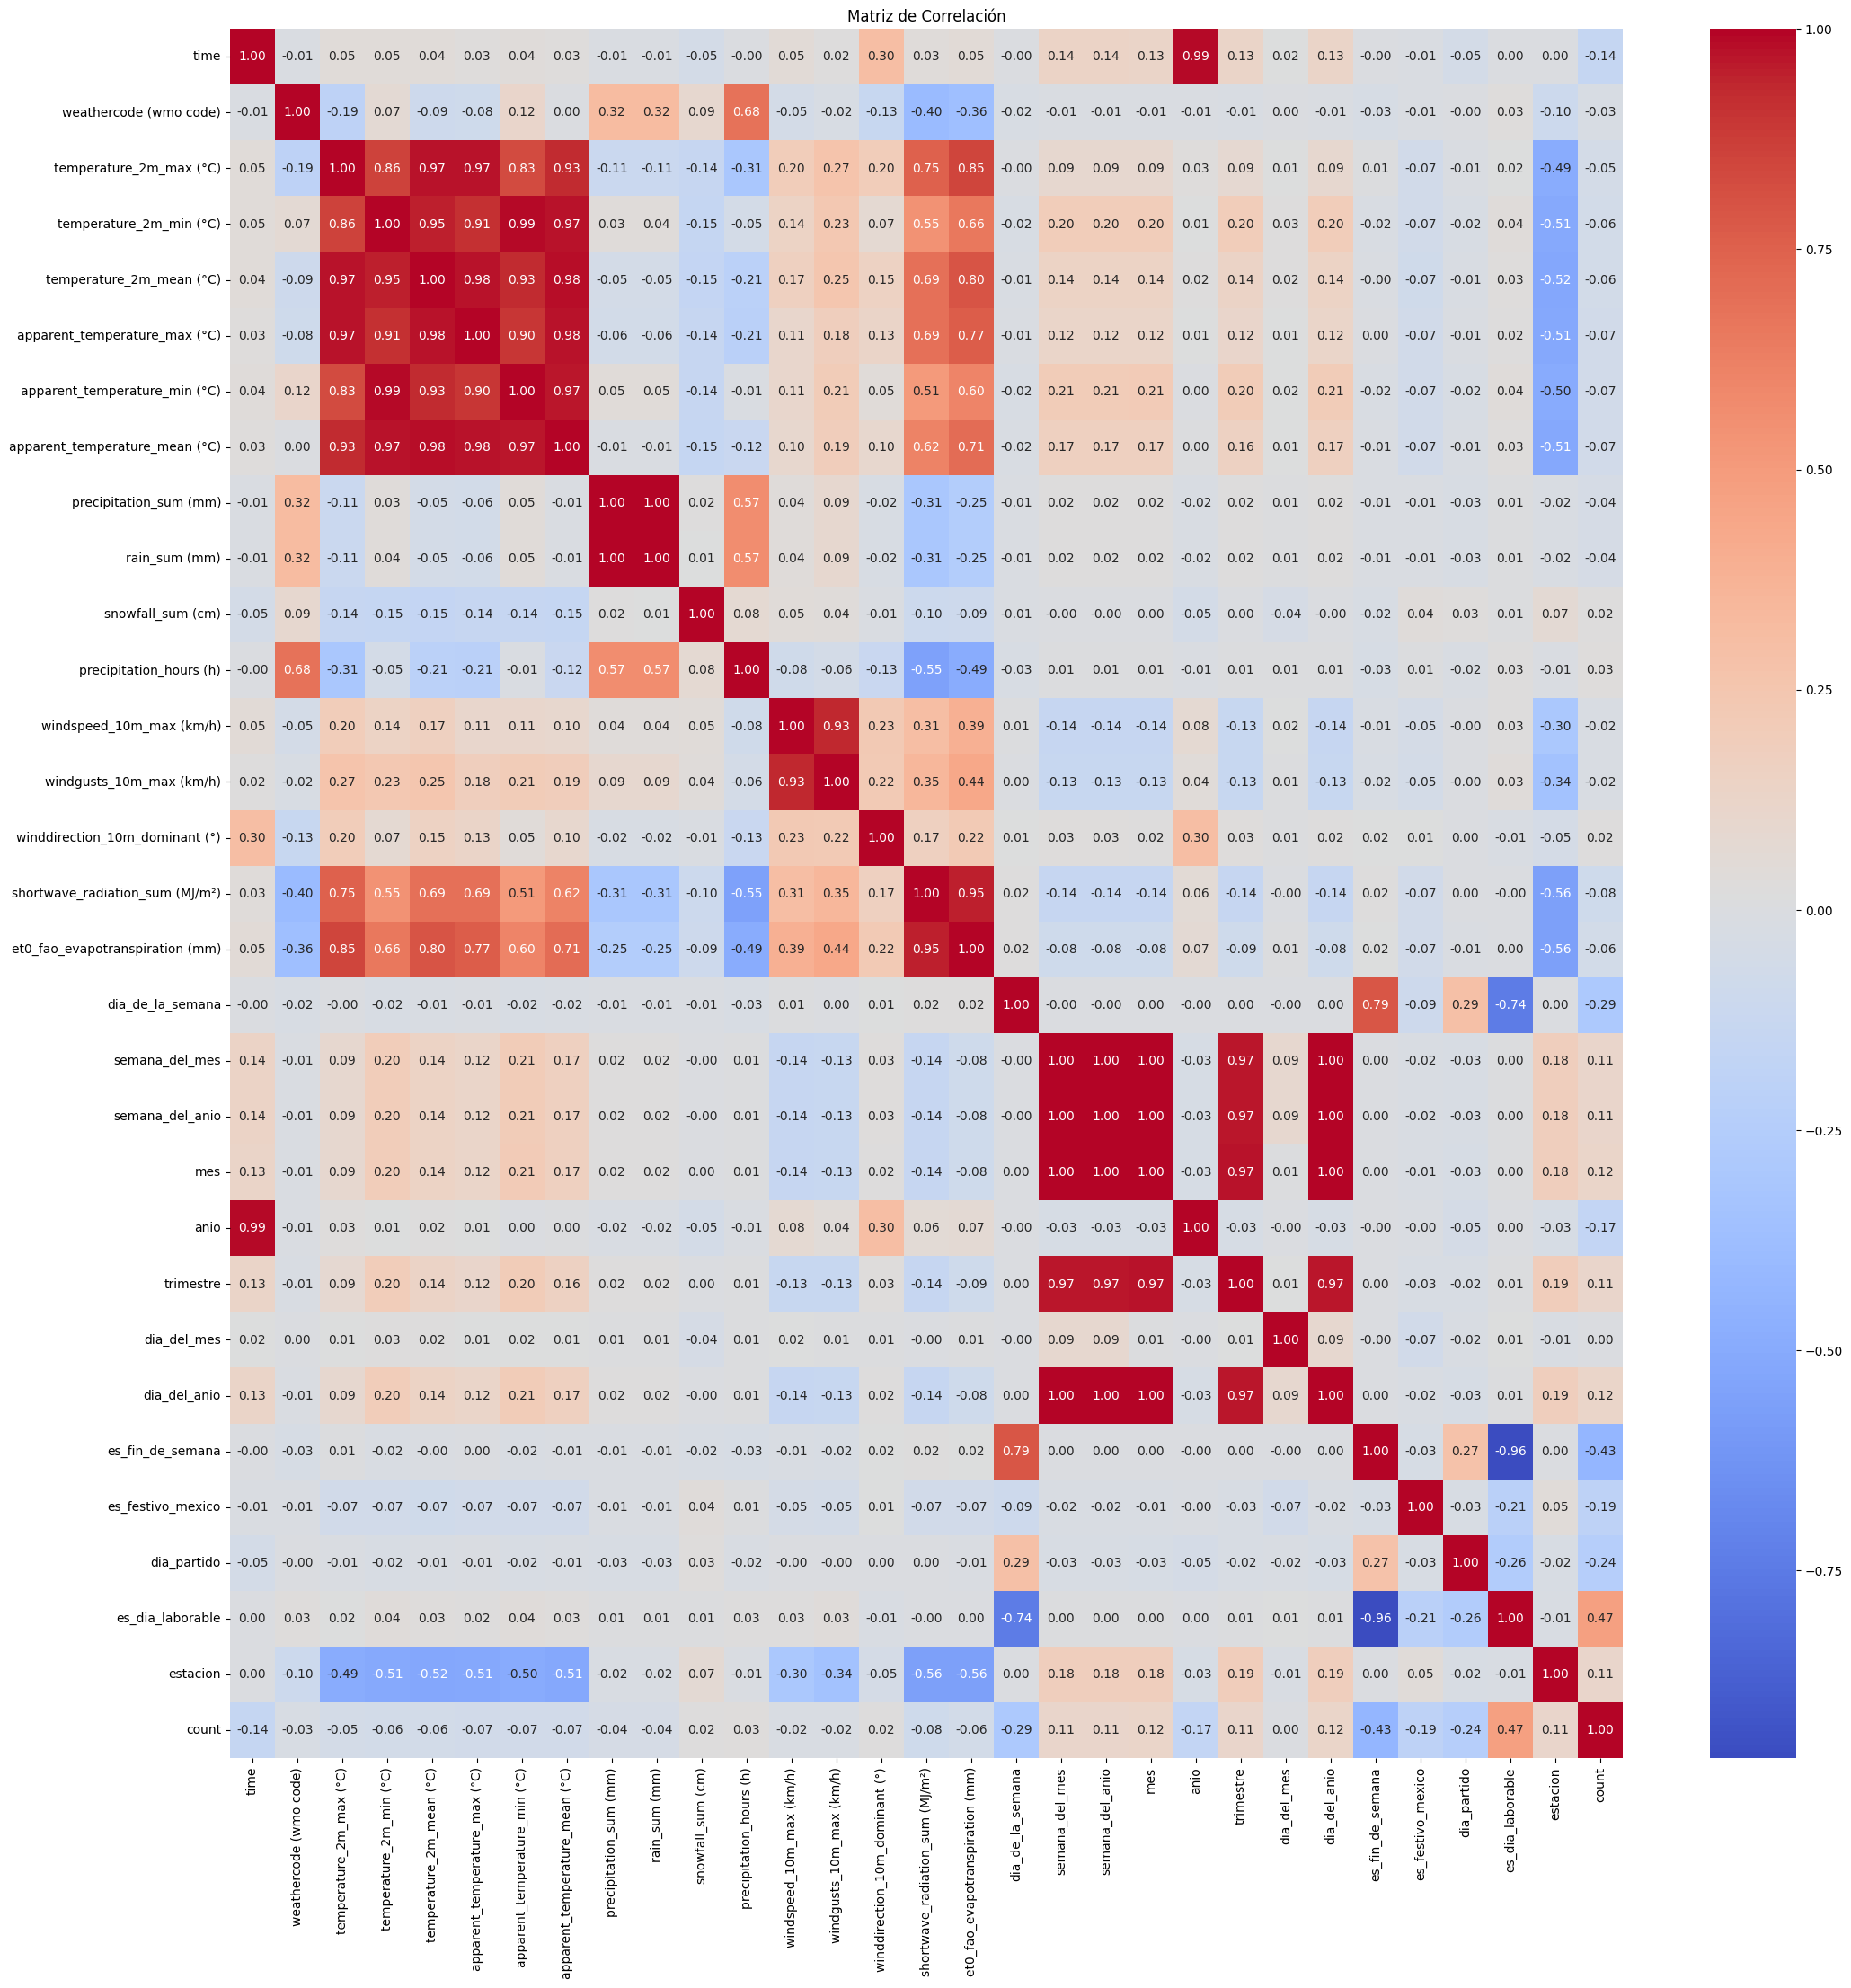

In [7]:
# Calcula la matriz de correlación
matriz_correlacion = df_new.corr()

# Crea un mapa de calor
plt.figure(figsize=(25, 25))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")  # 'annot' agrega los valores en cada celda, 'cmap' elige el esquema de colores, 'fmt' define el formato de los valores

# Configura el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


#### Interpretaciones
Al centrarnos en el conteo de los datos pareciera tener una ligera relacion positiva con "es_dia_laborable" y negativa con "es_fin_de_semana"

Pudiera indicar que los dias cuando se labora pudiera haber mas trafico 


## Prueba de hipótesis
Primero grafico los datos de mi variable de interes (# de accidentes diarios) para ver si siguen alguna distribucion a simple vista

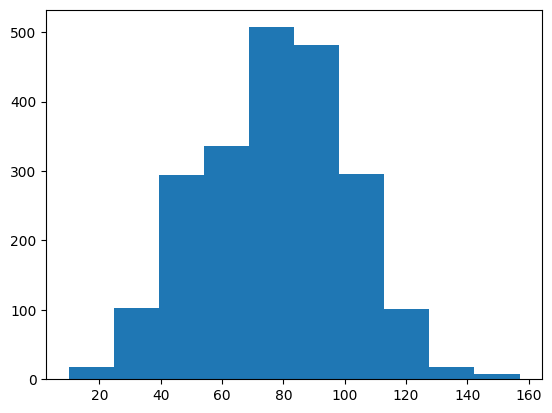

In [8]:
x = agregacion_por_fecha['count']

plt.hist(x)
plt.show() 

A simple vista pareciera seguir una distribucion normal por lo cual usare una prueva de Kolmogorov-Smirnov  para verificar

In [9]:
# Carga datos
data = agregacion_por_fecha['count']

# Calcula la media muestral
media_muestral = np.mean(data)

# Realiza la prueba de Kolmogorov-Smirnov para comprobar si los datos siguen una distribución normal
ks_estadistico, ks_valor_p = kstest(data, 'norm', args=(media_muestral, np.std(data)))


# Establece el nivel de significancia (alfa)
alfa = 0.05

# Compara el valor p con el nivel de significancia
if ks_valor_p < alfa:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.")
else:
    print("No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución normal.")

# Imprime los resultados de la prueba de Kolmogorov-Smirnov
print("Estadístico KS:", ks_estadistico)
print("Valor p:", ks_valor_p)

Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
Estadístico KS: 0.032161348082800884
Valor p: 0.022431944187438668


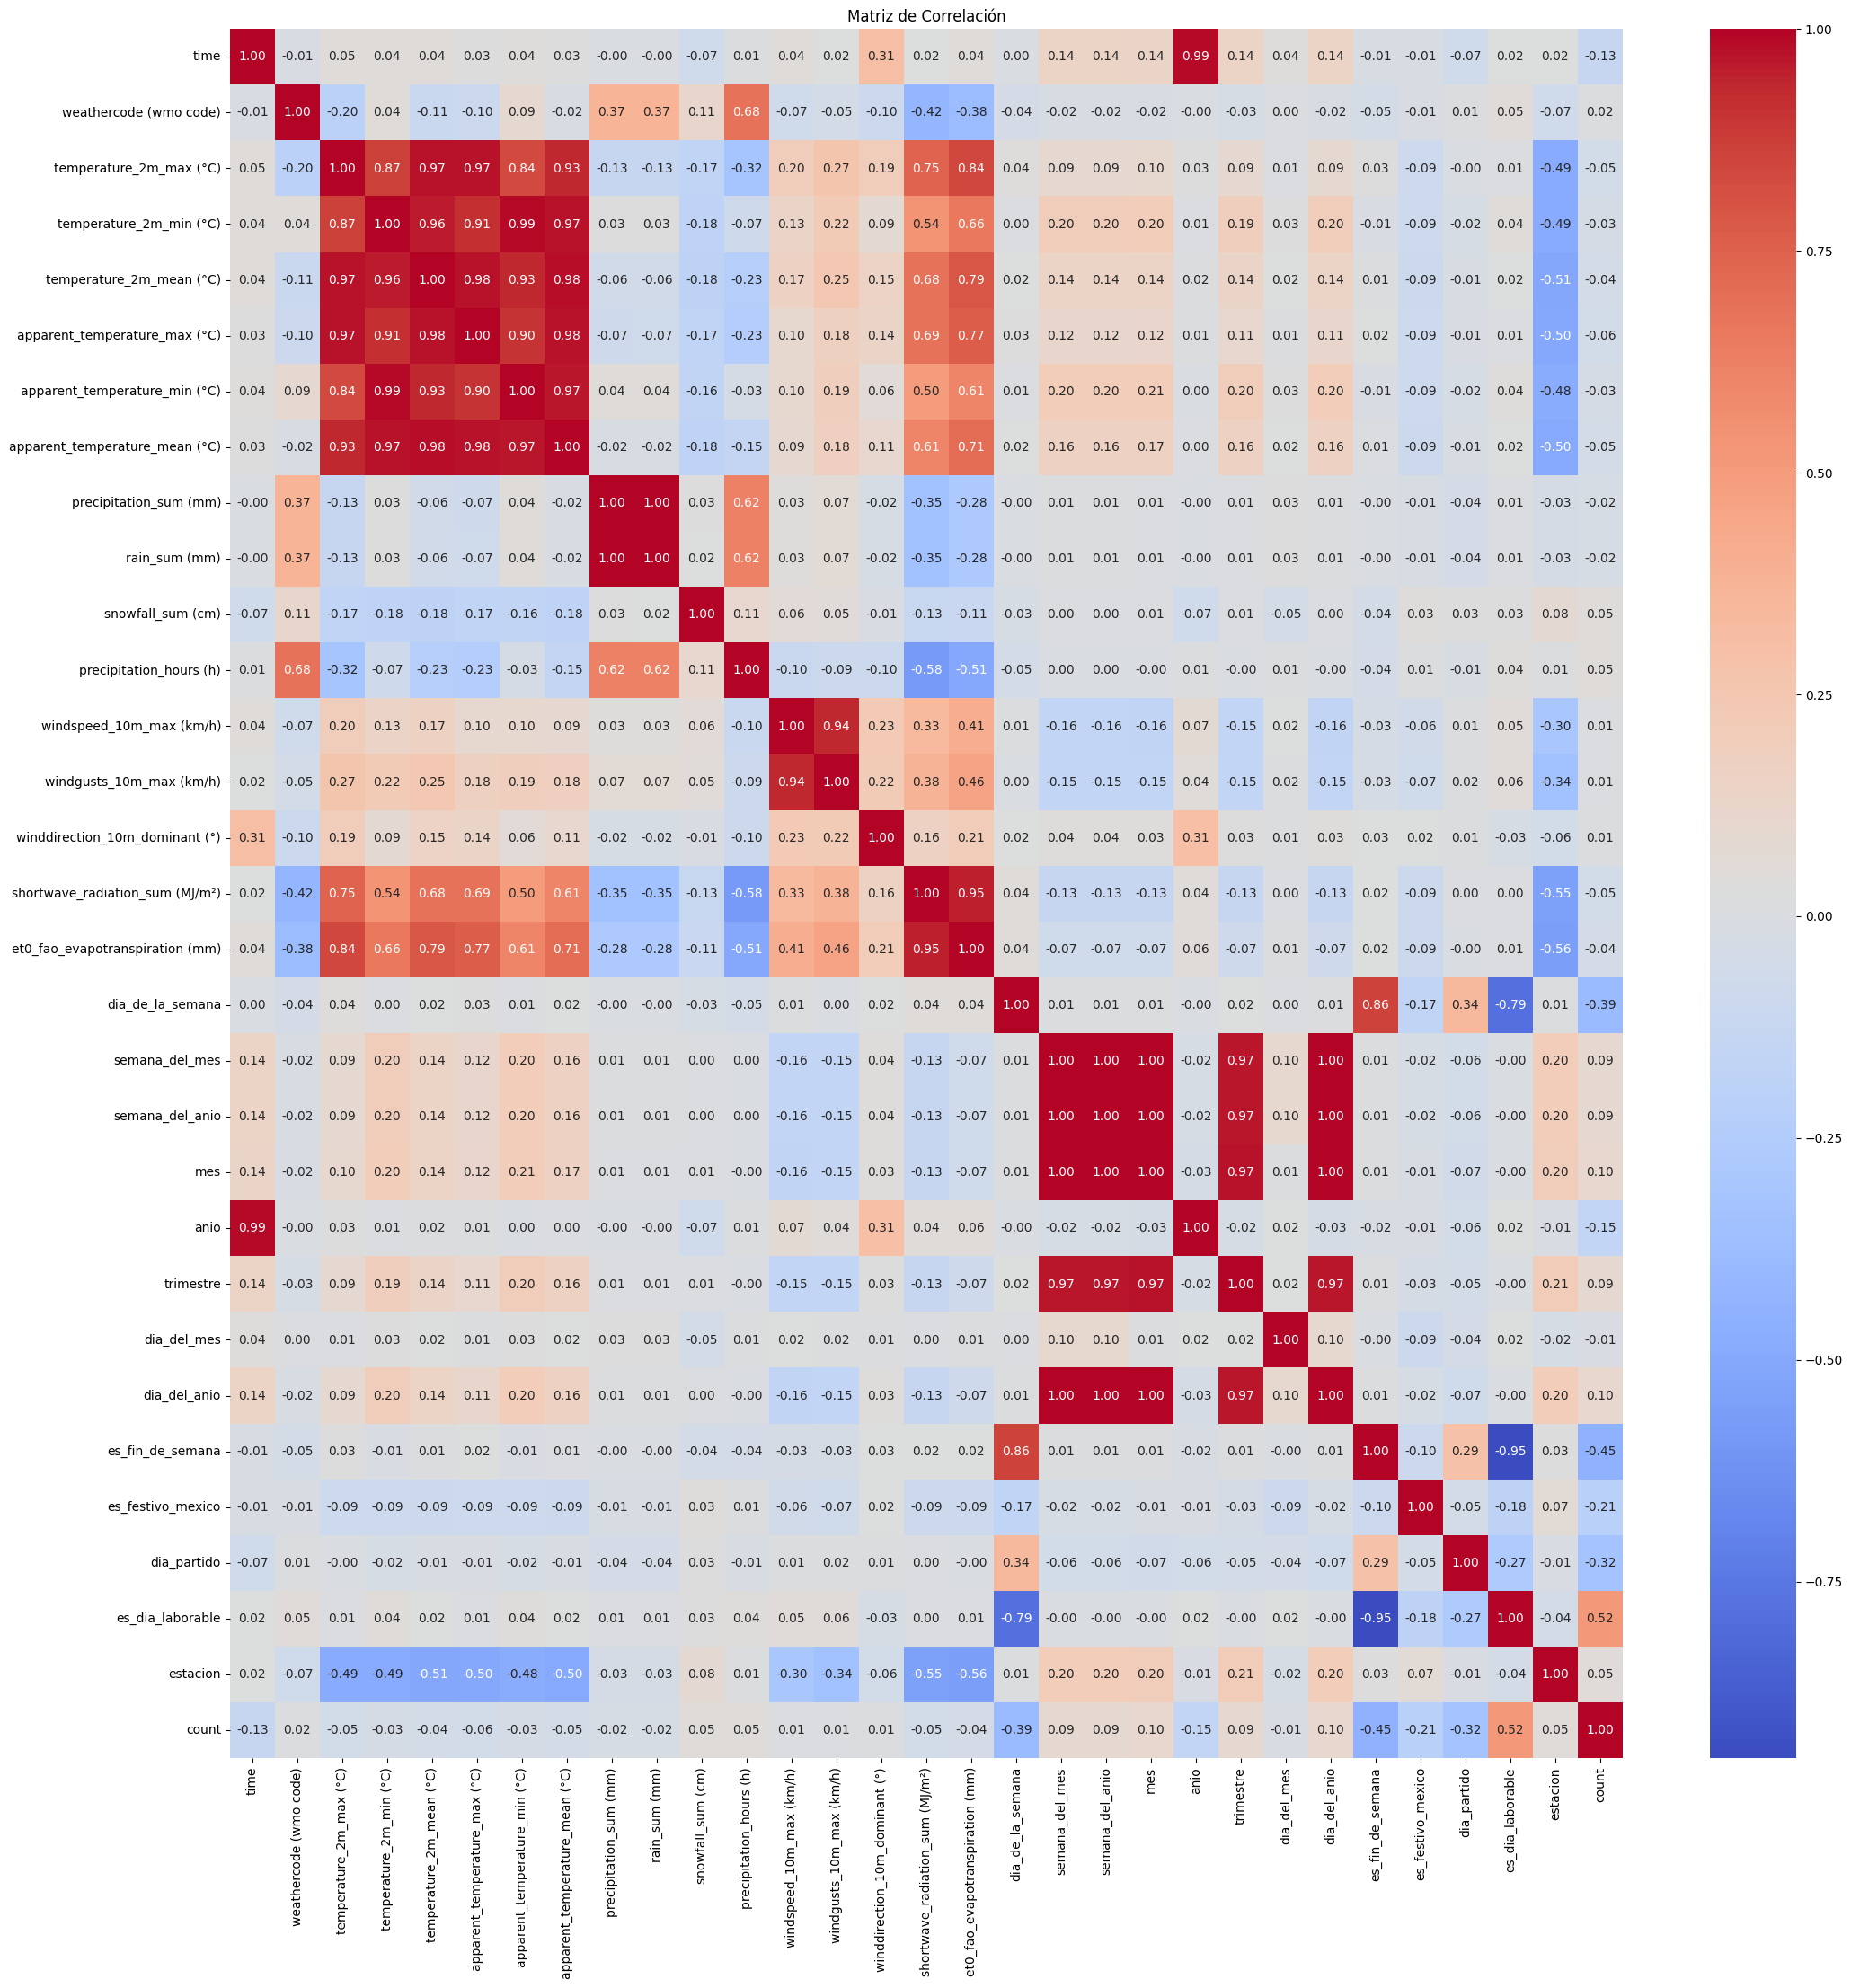

In [10]:
# Separa el DataFrame en las dos categorías
df_laborable = df_new[df_new['es_dia_laborable'] == 1]
df_no_laborable = df_new[df_new['es_dia_laborable'] == 0]

# Selecciona aleatoriamente la mitad de las entradas de 'es_dia_laborable' de la categoría 1
tamaño_muestra = min(len(df_laborable), len(df_no_laborable))
df_laborable_muestreado = df_laborable.sample(n=tamaño_muestra, random_state=42)

# Combina las entradas muestreadas de 'es_dia_laborable' de la categoría 1 con todas las entradas de 'es_dia_laborable' de la categoría 0
balanced_df = pd.concat([df_laborable_muestreado, df_no_laborable])

# Baraja las filas en el DataFrame balanceado
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Ahora, 'balanced_df' contiene un conjunto de datos balanceado con un número igual de días para cada categoría
# Calcula la matriz de correlación
matriz_correlacion = balanced_df.corr()

# Crea un mapa de calor
plt.figure(figsize=(25, 25))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")  # 'annot' agrega los valores en cada celda, 'cmap' elige el esquema de colores, 'fmt' define el formato de los valores

# Configura el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()
